In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('Preprocessed Dataset.csv')
df.head()

,Unnamed: 0,category,rating,label,text_
0,0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort i love veri pretti
1,1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin i 've mine coupl year
2,2,Home_and_Kitchen_5,5.0,CG,thi pillow save back i love look feel pillow
3,3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price i
4,4,Home_and_Kitchen_5,5.0,CG,veri nice set good qualiti we set two month


In [8]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort i love veri pretti
1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin i 've mine coupl year
2,Home_and_Kitchen_5,5.0,CG,thi pillow save back i love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price i
4,Home_and_Kitchen_5,5.0,CG,veri nice set good qualiti we set two month


In [9]:
df.dropna(inplace = True)

In [10]:
df['length'] = df['text_'].apply(len)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40431 entries, 0 to 40431
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40431 non-null  object 
 1   rating    40431 non-null  float64
 2   label     40431 non-null  object 
 3   text_     40431 non-null  object 
 4   length    40431 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.9+ MB


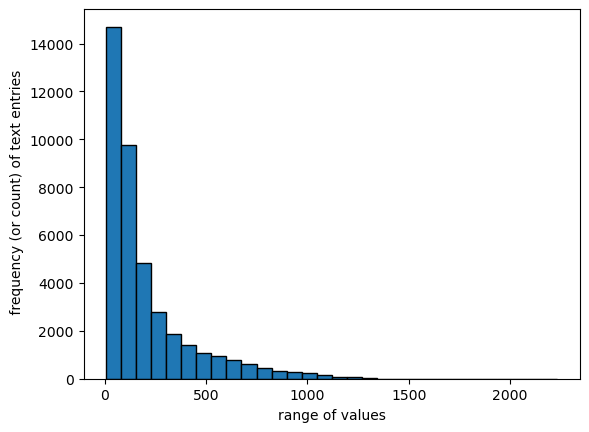

In [12]:
plt.hist(df['length'], ec = 'black', bins = 30)
plt.xlabel("range of values")  
plt.ylabel(" frequency (or count) of text entries") 
plt.show()

In [13]:
df.groupby('label').describe()

rating                                                length  \
         count      mean       std  min  25%  50%  75%  max    count   
label                                                                  
CG     20215.0  4.259906  1.141092  1.0  4.0  5.0  5.0  5.0  20215.0   
OR     20216.0  4.253265  1.147652  1.0  4.0  5.0  5.0  5.0  20216.0   

                                                                 
             mean         std   min   25%    50%    75%     max  
label                                                            
CG     173.628593  173.942542  13.0  57.0   99.0  217.0  1300.0  
OR     237.883063  252.923025   8.0  74.0  134.0  296.0  2232.0

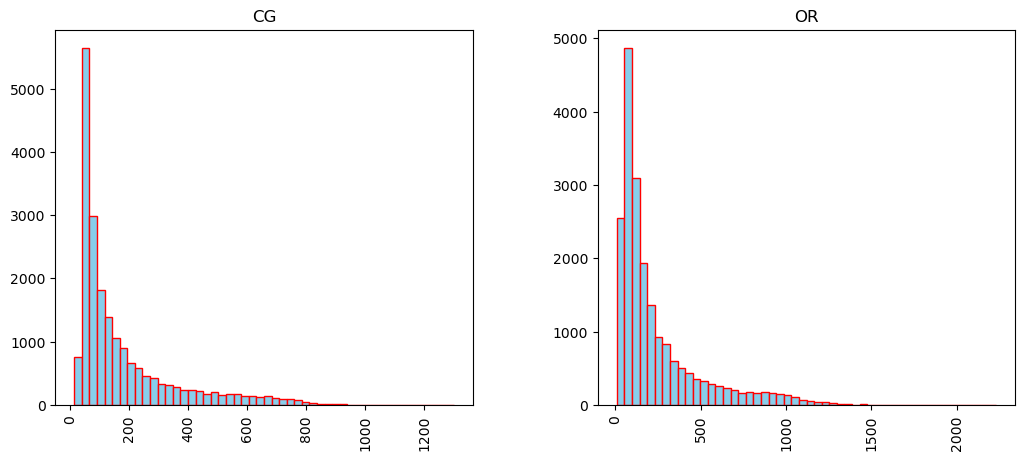

In [14]:
df.hist(column = 'length', by = 'label', bins = 50, color='skyblue', ec = 'red', figsize = (12, 5))
plt.show()

In [15]:
df[df['label']=='OR'][['text_','length']].sort_values(by='length',ascending=False).head().iloc[0].text_

"weak on current scienc after see twice i agre much posit five star review out respect read review i 'll repeat everyth i like present i found goofi over ear hairdo facial hair arrang daniel vitali describ `` wild food expert '' distract ugh ditto david wolf extrem goofi wild hairdo on hand jon gabriel describ `` author weight loss expert '' nice groom good present hi stori person transform fellow pound whew becom jock normal weight inspir christian northrup preserv rank one america 's cutest doctor a realli nice look woman present dr. mercola jason vale kri carr alejandro junger fine it disappoint jami oliv popular uk give babi cow growth fluid pas unscientif popular idea milk none present anyth zilch say work doctor t. colin campbel milk bodi bad it good see present take stand sugar they agre evil sugar refin carbohydr with respect dr. northrup `` it 's fat make fat 's sugar '' statement pas muster commun expert recogn evil sugar not mutual exclus recogn proven danger fat particularl

In [16]:
df.length.describe()

count    40431.000000
mean       205.756622
std        219.418478
min          8.000000
25%         64.000000
50%        116.000000
75%        253.000000
max       2232.000000
Name: length, dtype: float64

In [17]:
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [18]:
import nltk, string
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [19]:
bow_transformer = CountVectorizer(analyzer=text_process)
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x00000265008EB420>)

In [20]:
bow_transformer.fit(df['text_'])
print("Total Vocabulary:",len(bow_transformer.vocabulary_))

Total Vocabulary: 34440


In [21]:
review4 = df['text_'][3]
review4

'miss inform use great product price i'

In [22]:
# print(bow_transformer.get_feature_names_out()[15841])
# print(bow_transformer.get_feature_names_out()[23848])

In [23]:
bow_reviews = bow_transformer.transform(df['text_'])

In [24]:
print("Shape of Bag of Words Transformer for the entire reviews corpus:",bow_reviews.shape)
print("Amount of non zero values in the bag of words model:",bow_reviews.nnz)

Shape of Bag of Words Transformer for the entire reviews corpus: (40431, 34440)
Amount of non zero values in the bag of words model: 1013889


In [25]:
print("Sparsity:",np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100,2))

Sparsity: 0.07


In [26]:
tfidf_transformer = TfidfTransformer().fit(bow_reviews)
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['mango']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['book']])

10.91422964906803
2.821684385176731


In [27]:
tfidf_reviews = tfidf_transformer.transform(bow_reviews)
print("Shape:",tfidf_reviews.shape)
print("No. of Dimensions:",tfidf_reviews.ndim)

Shape: (40431, 34440)
No. of Dimensions: 2


## Creating Training & Testing Data

In [28]:
review_train, review_test, label_train, label_test = train_test_split(df['text_'],df['label'],test_size=0.35)

In [29]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [30]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000265008EB420>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [31]:
prediction = pipeline.predict(review_test)
prediction

array(['OR', 'OR', 'OR', ..., 'CG', 'CG', 'CG'], dtype='<U2')

In [32]:
print('Classification Report:', classification_report(label_test,prediction))
print('Confusion Matrix:', confusion_matrix(label_test,prediction))
print('Accuracy Score:', accuracy_score(label_test,prediction))

Classification Report:               precision    recall  f1-score   support

          CG       0.82      0.88      0.85      7035
          OR       0.87      0.81      0.84      7116

    accuracy                           0.84     14151
   macro avg       0.85      0.84      0.84     14151
weighted avg       0.85      0.84      0.84     14151

Confusion Matrix: [[6213  822]
 [1376 5740]]
Accuracy Score: 0.8446752879655148


In [33]:
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,prediction)*100,2)) + '%')

Model Prediction Accuracy: 84.47%


In [34]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [35]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000265008EB420>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [36]:
rfc_pred = pipeline.predict(review_test)
rfc_pred

array(['CG', 'OR', 'OR', ..., 'CG', 'OR', 'CG'], dtype=object)

In [37]:
print('Classification Report:',classification_report(label_test,rfc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,rfc_pred))
print('Accuracy Score:',accuracy_score(label_test,rfc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.81      0.88      0.84      7035
          OR       0.87      0.80      0.83      7116

    accuracy                           0.84     14151
   macro avg       0.84      0.84      0.84     14151
weighted avg       0.84      0.84      0.84     14151

Confusion Matrix: [[6164  871]
 [1437 5679]]
Accuracy Score: 0.8369019857253904
Model Prediction Accuracy: 83.69%


In [38]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',DecisionTreeClassifier())
])

In [39]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000265008EB420>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', DecisionTreeClassifier())])

In [40]:
dtree_pred = pipeline.predict(review_test)
dtree_pred

array(['OR', 'OR', 'OR', ..., 'CG', 'OR', 'CG'], dtype=object)

In [41]:
print('Classification Report:',classification_report(label_test,dtree_pred))
print('Confusion Matrix:',confusion_matrix(label_test,dtree_pred))
print('Accuracy Score:',accuracy_score(label_test,dtree_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.73      0.74      0.73      7035
          OR       0.74      0.73      0.73      7116

    accuracy                           0.73     14151
   macro avg       0.73      0.73      0.73     14151
weighted avg       0.73      0.73      0.73     14151

Confusion Matrix: [[5175 1860]
 [1944 5172]]
Accuracy Score: 0.731185075259699
Model Prediction Accuracy: 73.12%


In [42]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',KNeighborsClassifier(n_neighbors=2))
])

In [43]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000265008EB420>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', KNeighborsClassifier(n_neighbors=2))])

In [44]:
knn_pred = pipeline.predict(review_test)
knn_pred

array(['CG', 'OR', 'CG', ..., 'CG', 'CG', 'CG'], dtype=object)

In [45]:
print('Classification Report:',classification_report(label_test,knn_pred))
print('Confusion Matrix:',confusion_matrix(label_test,knn_pred))
print('Accuracy Score:',accuracy_score(label_test,knn_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.54      0.97      0.69      7035
          OR       0.86      0.18      0.30      7116

    accuracy                           0.57     14151
   macro avg       0.70      0.58      0.50     14151
weighted avg       0.70      0.57      0.49     14151

Confusion Matrix: [[6828  207]
 [5837 1279]]
Accuracy Score: 0.5728923750971663
Model Prediction Accuracy: 57.29%


In [46]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
])

In [47]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000265008EB420>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [48]:
svc_pred = pipeline.predict(review_test)
svc_pred

array(['OR', 'OR', 'OR', ..., 'CG', 'OR', 'CG'], dtype=object)

In [49]:
print('Classification Report:',classification_report(label_test,svc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,svc_pred))
print('Accuracy Score:',accuracy_score(label_test,svc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.89      0.87      0.88      7035
          OR       0.87      0.90      0.88      7116

    accuracy                           0.88     14151
   macro avg       0.88      0.88      0.88     14151
weighted avg       0.88      0.88      0.88     14151

Confusion Matrix: [[6091  944]
 [ 743 6373]]
Accuracy Score: 0.8807858101900926
Model Prediction Accuracy: 88.08%


In [50]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
])

In [51]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000265008EB420>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [52]:
lr_pred = pipeline.predict(review_test)
lr_pred

array(['OR', 'OR', 'OR', ..., 'CG', 'OR', 'OR'], dtype=object)

In [53]:
print('Classification Report:',classification_report(label_test,lr_pred))
print('Confusion Matrix:',confusion_matrix(label_test,lr_pred))
print('Accuracy Score:',accuracy_score(label_test,lr_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.87      0.85      0.86      7035
          OR       0.86      0.88      0.87      7116

    accuracy                           0.86     14151
   macro avg       0.86      0.86      0.86     14151
weighted avg       0.86      0.86      0.86     14151

Confusion Matrix: [[5979 1056]
 [ 873 6243]]
Accuracy Score: 0.8636845452618189
Model Prediction Accuracy: 86.37%


# Conclsion

In [54]:
print('Performance of various ML models:')
print('\n')
print('Logistic Regression Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')
print('K Nearest Neighbors Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')
print('Decision Tree Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')
print('Random Forests Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')
print('Support Vector Machines Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')
print('Multinomial Naive Bayes Prediction Accuracy:',str(np.round(accuracy_score(label_test,prediction)*100,2)) + '%')

Performance of various ML models:


Logistic Regression Prediction Accuracy: 86.37%
K Nearest Neighbors Prediction Accuracy: 57.29%
Decision Tree Classifier Prediction Accuracy: 73.12%
Random Forests Classifier Prediction Accuracy: 83.69%
Support Vector Machines Prediction Accuracy: 88.08%
Multinomial Naive Bayes Prediction Accuracy: 84.47%


# Model

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

# Vectorize text
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(review_train)
X_test_vect = vectorizer.transform(review_test)

# Train SVM
model = SVC()
model.fit(X_train_vect, label_train)

SVC()

In [58]:
import pickle

In [69]:
with open('model_pickle.pkl', 'wb') as f:
    pickle.dump(model, f) 

In [70]:
with open('model_pickle.pkl', 'rb') as f:
     mp = pickle.load(f)

In [74]:
pickle.dump(vectorizer, open('vectorizer_pickle.pkl', 'wb'))

In [71]:
import joblib

In [72]:
joblib.dump(model, 'model.joblib')

['model.joblib']

In [73]:
mj = joblib.load('model.joblib')